# **Graduate Admission Probability Prediction**
---


### 🧑‍💼 **Shuvendu Pritam Das**  
*Data Science / ML Enthusiast*  

- **GitHub:** [SPritamDas](https://github.com/SPritamDas/My-Profile)  
- **LinkedIn:** [Shuvendu Pritam Das](https://www.linkedin.com/in/shuvendupritamdas/)  
- **Email:** shuvendupritamdas181@gmail.com  

---



# 🎓 **Graduate Admission Probability Prediction** 🚀

---

## 📊 **About the Dataset**
This dataset is designed for predicting **graduate admissions** from an Indian perspective. It contains multiple factors that are considered significant when applying for **Master's programs**.


**📌 Context:**
The dataset captures various key parameters influencing admission decisions for graduate programs.

**🗂 Content:**
The dataset includes the following features:
- 🎓 **GRE Scores** (out of 340)
- 📚 **TOEFL Scores** (out of 120)
- 🏫 **University Rating** (out of 5)
- 📝 **Statement of Purpose (SOP)** and **Letter of Recommendation (LOR)** Strength (out of 5)
- 🎓 **Undergraduate GPA** (out of 10)
- 🧑‍🔬 **Research Experience** (either 0 or 1)
- 🎯 **Chance of Admit** (ranging from 0 to 1)

---

## 🎯 **Objective**
The goal is to predict the **probability of graduate admission** based on the above factors using various **machine learning models**.

---

## 🛠 **Models Used**

Here are the models applied in the project:

1. **Linear Regression** 📈
2. **K-Nearest Neighbors (KNN)** 🤖
3. **Support Vector Regressor (SVR)** 📊
4. **Decision Tree** 🌳
5. **Random Forest** 🌲🌲
6. **Bagging** 🧳
7. **Boosting** ⚡
   - **Gradient Boosting** 🌟
   - **XGBoost** 🚀
   - **LightGBM** 💡
8. **Stacking** 🏗
9. **Perceptron** ⚙
10. **Artificial Neural Networks (ANN)** 🧠

---

### **Model Evaluation Metrics**:
To evaluate the models, the following metrics were used:
- 📊 **R-squared (R²)**
- 📉 **Mean Squared Error (MSE)**
- 🔄 **Root Mean Squared Error (RMSE)**
- 🔍 **Mean Absolute Error (MAE)**

---

### **Project Summary**

This project applies **state-of-the-art** machine learning models to provide **insightful predictions** into the **Graduate Admission process**. The models will be evaluated based on **accuracy**, **performance**, and **interpretability**.

---

Hope you enjoy exploring this project! 💻🚀


# Importing Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
import time
from sklearn.metrics import mean_squared_error,r2_score

# Importing Dataset

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [3]:
df = pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv',index_col=0)

# Exploring Dataset

## Shape

In [4]:
df.shape

(500, 8)

## Top Rows

In [5]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


## Features Description

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 1 to 500
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 35.2 KB


## Null Value Check

In [7]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

## Duplicate Value Check

In [8]:
df.duplicated().sum()

0

## Statistical Description

In [9]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


# Uni Variate Analysis

In [10]:
for i in df.columns:
    print(i,':',len(df[i].unique()))

GRE Score : 49
TOEFL Score : 29
University Rating : 5
SOP : 9
LOR  : 9
CGPA : 184
Research : 2
Chance of Admit  : 61


### Output Distribution

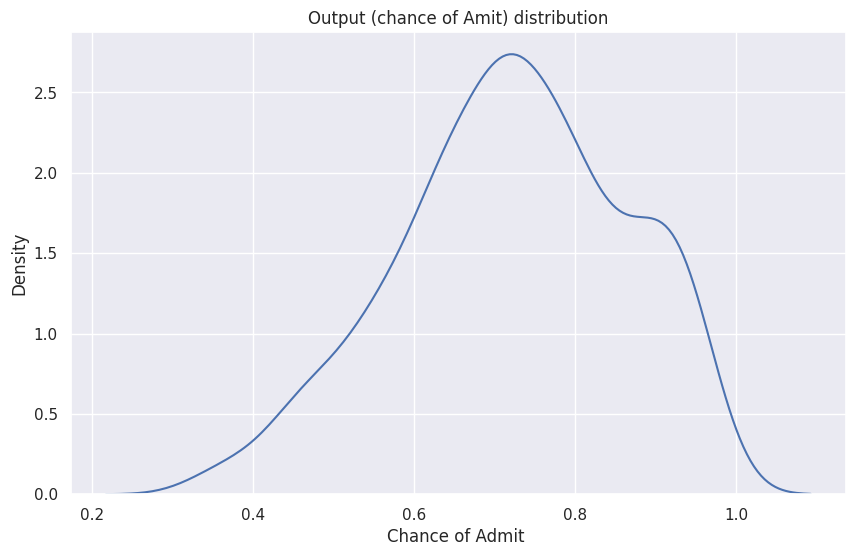

In [11]:
plt.figure(figsize=(10,6))
sns.kdeplot(df['Chance of Admit '])
plt.title('Output (chance of Amit) distribution')
plt.show()

### Input Distributions

#### Numerical Variables

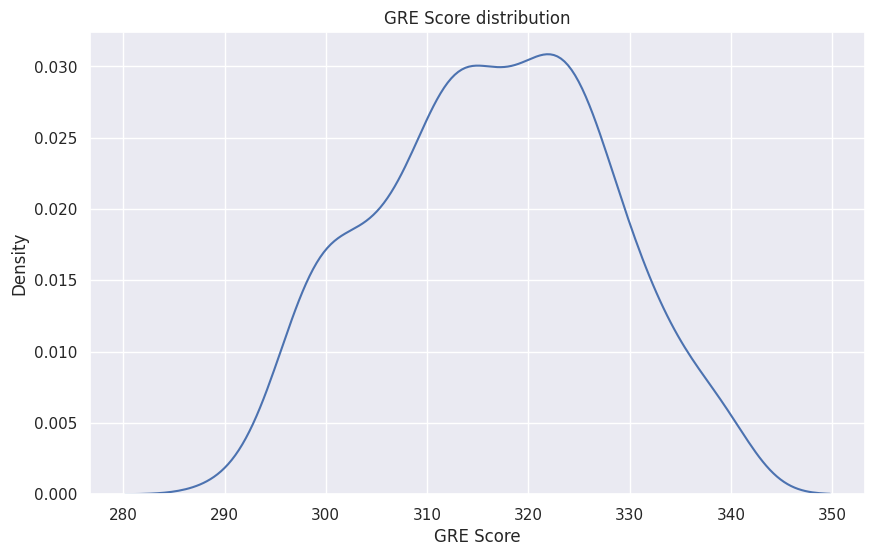

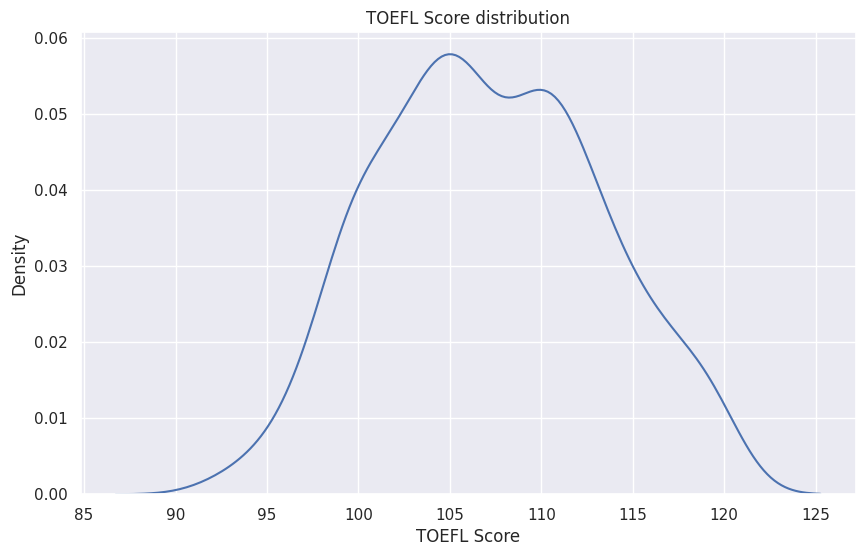

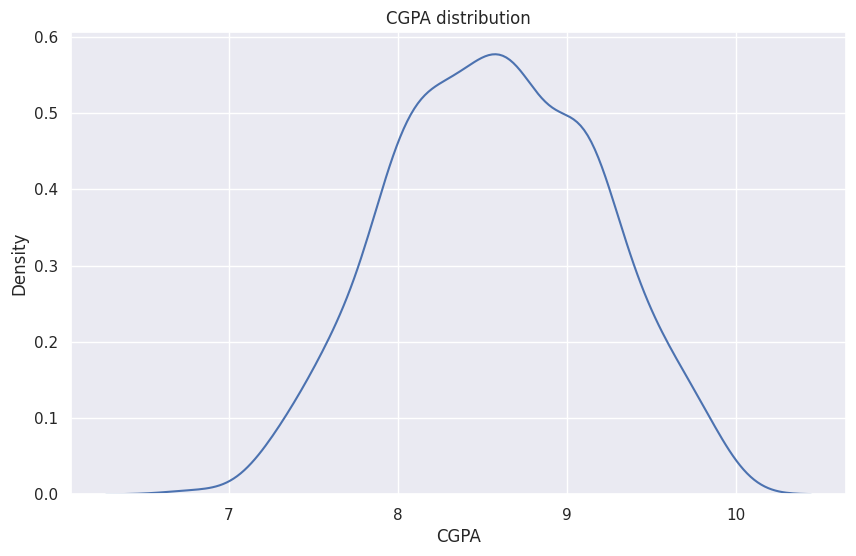

In [12]:
for i in ['GRE Score', 'TOEFL Score', 'CGPA']:
    plt.figure(figsize=(10,6))
    sns.kdeplot(df[i])
    plt.title(i+' distribution')
    plt.show()

#### Categorical Variables

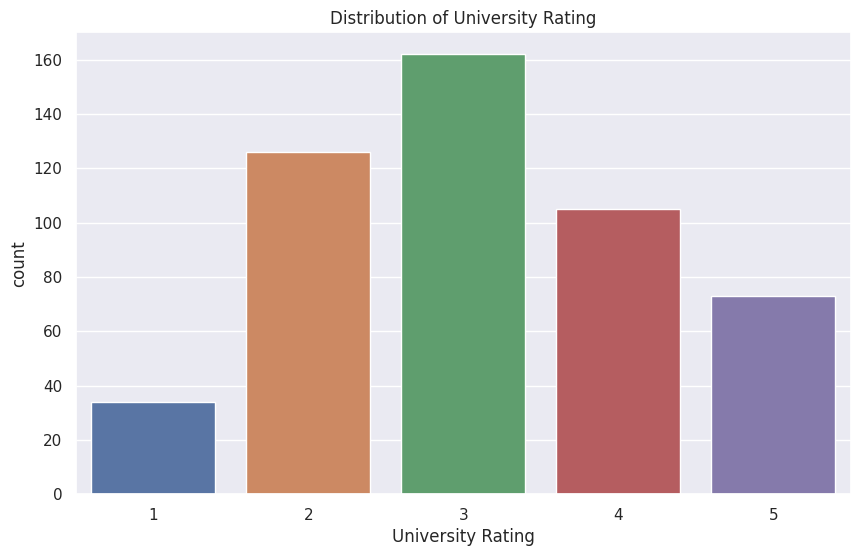

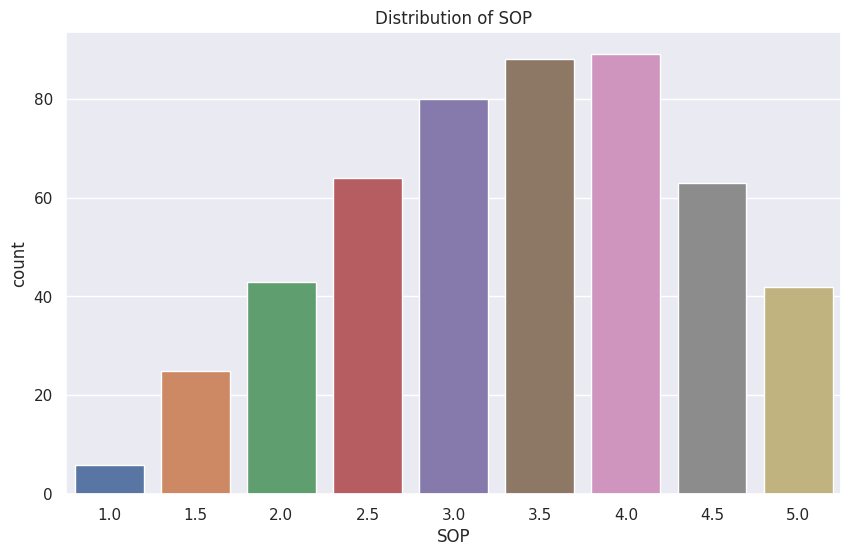

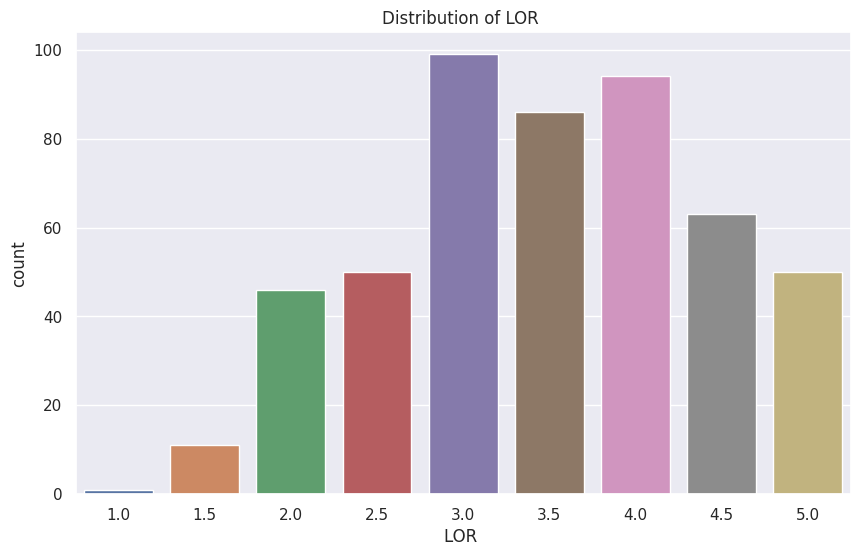

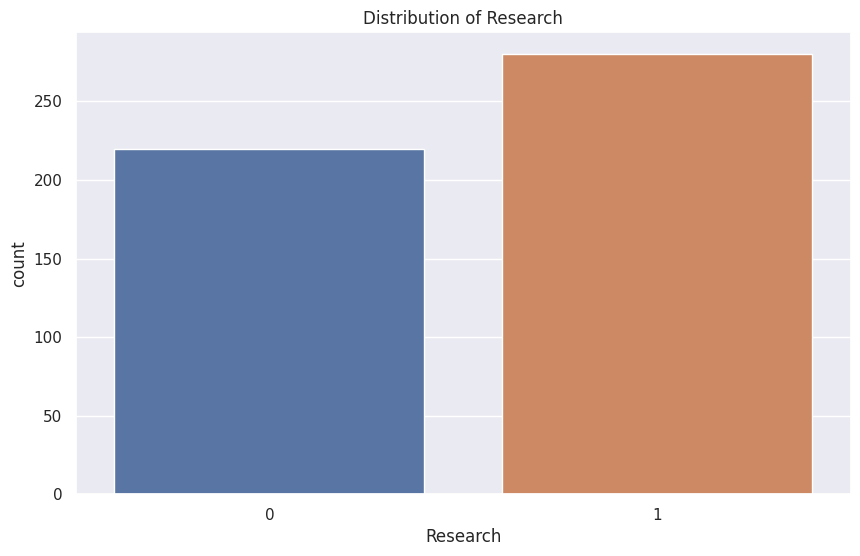

In [13]:
for i in ['University Rating', 'SOP', 'LOR ','Research']:
    plt.figure(figsize=(10,6))
    sns.countplot(df,x=i)
    plt.title('Distribution of '+i)
    plt.show()

# Bi Variate Analysis

In [14]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


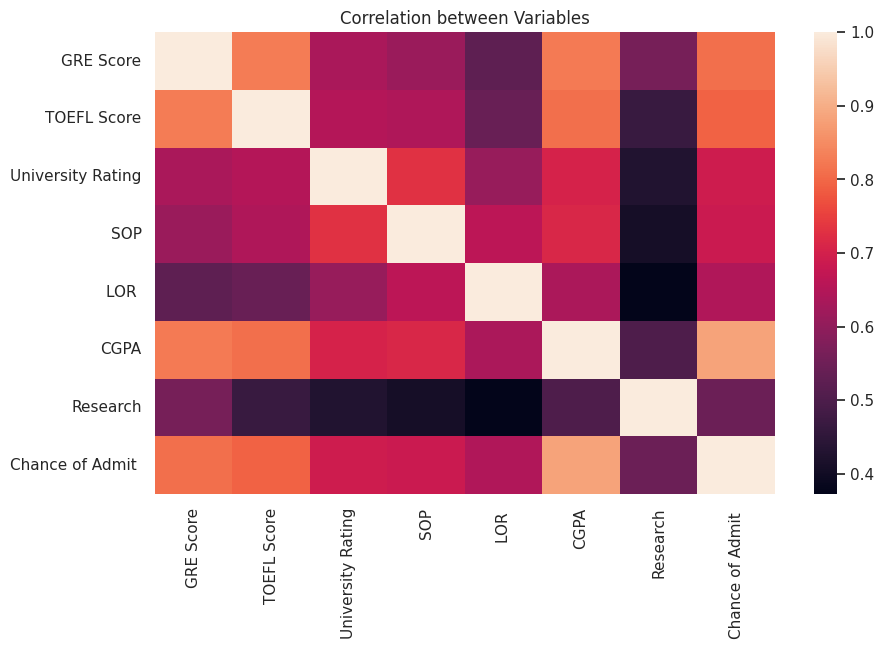

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr())
plt.title('Correlation between Variables')
plt.show()

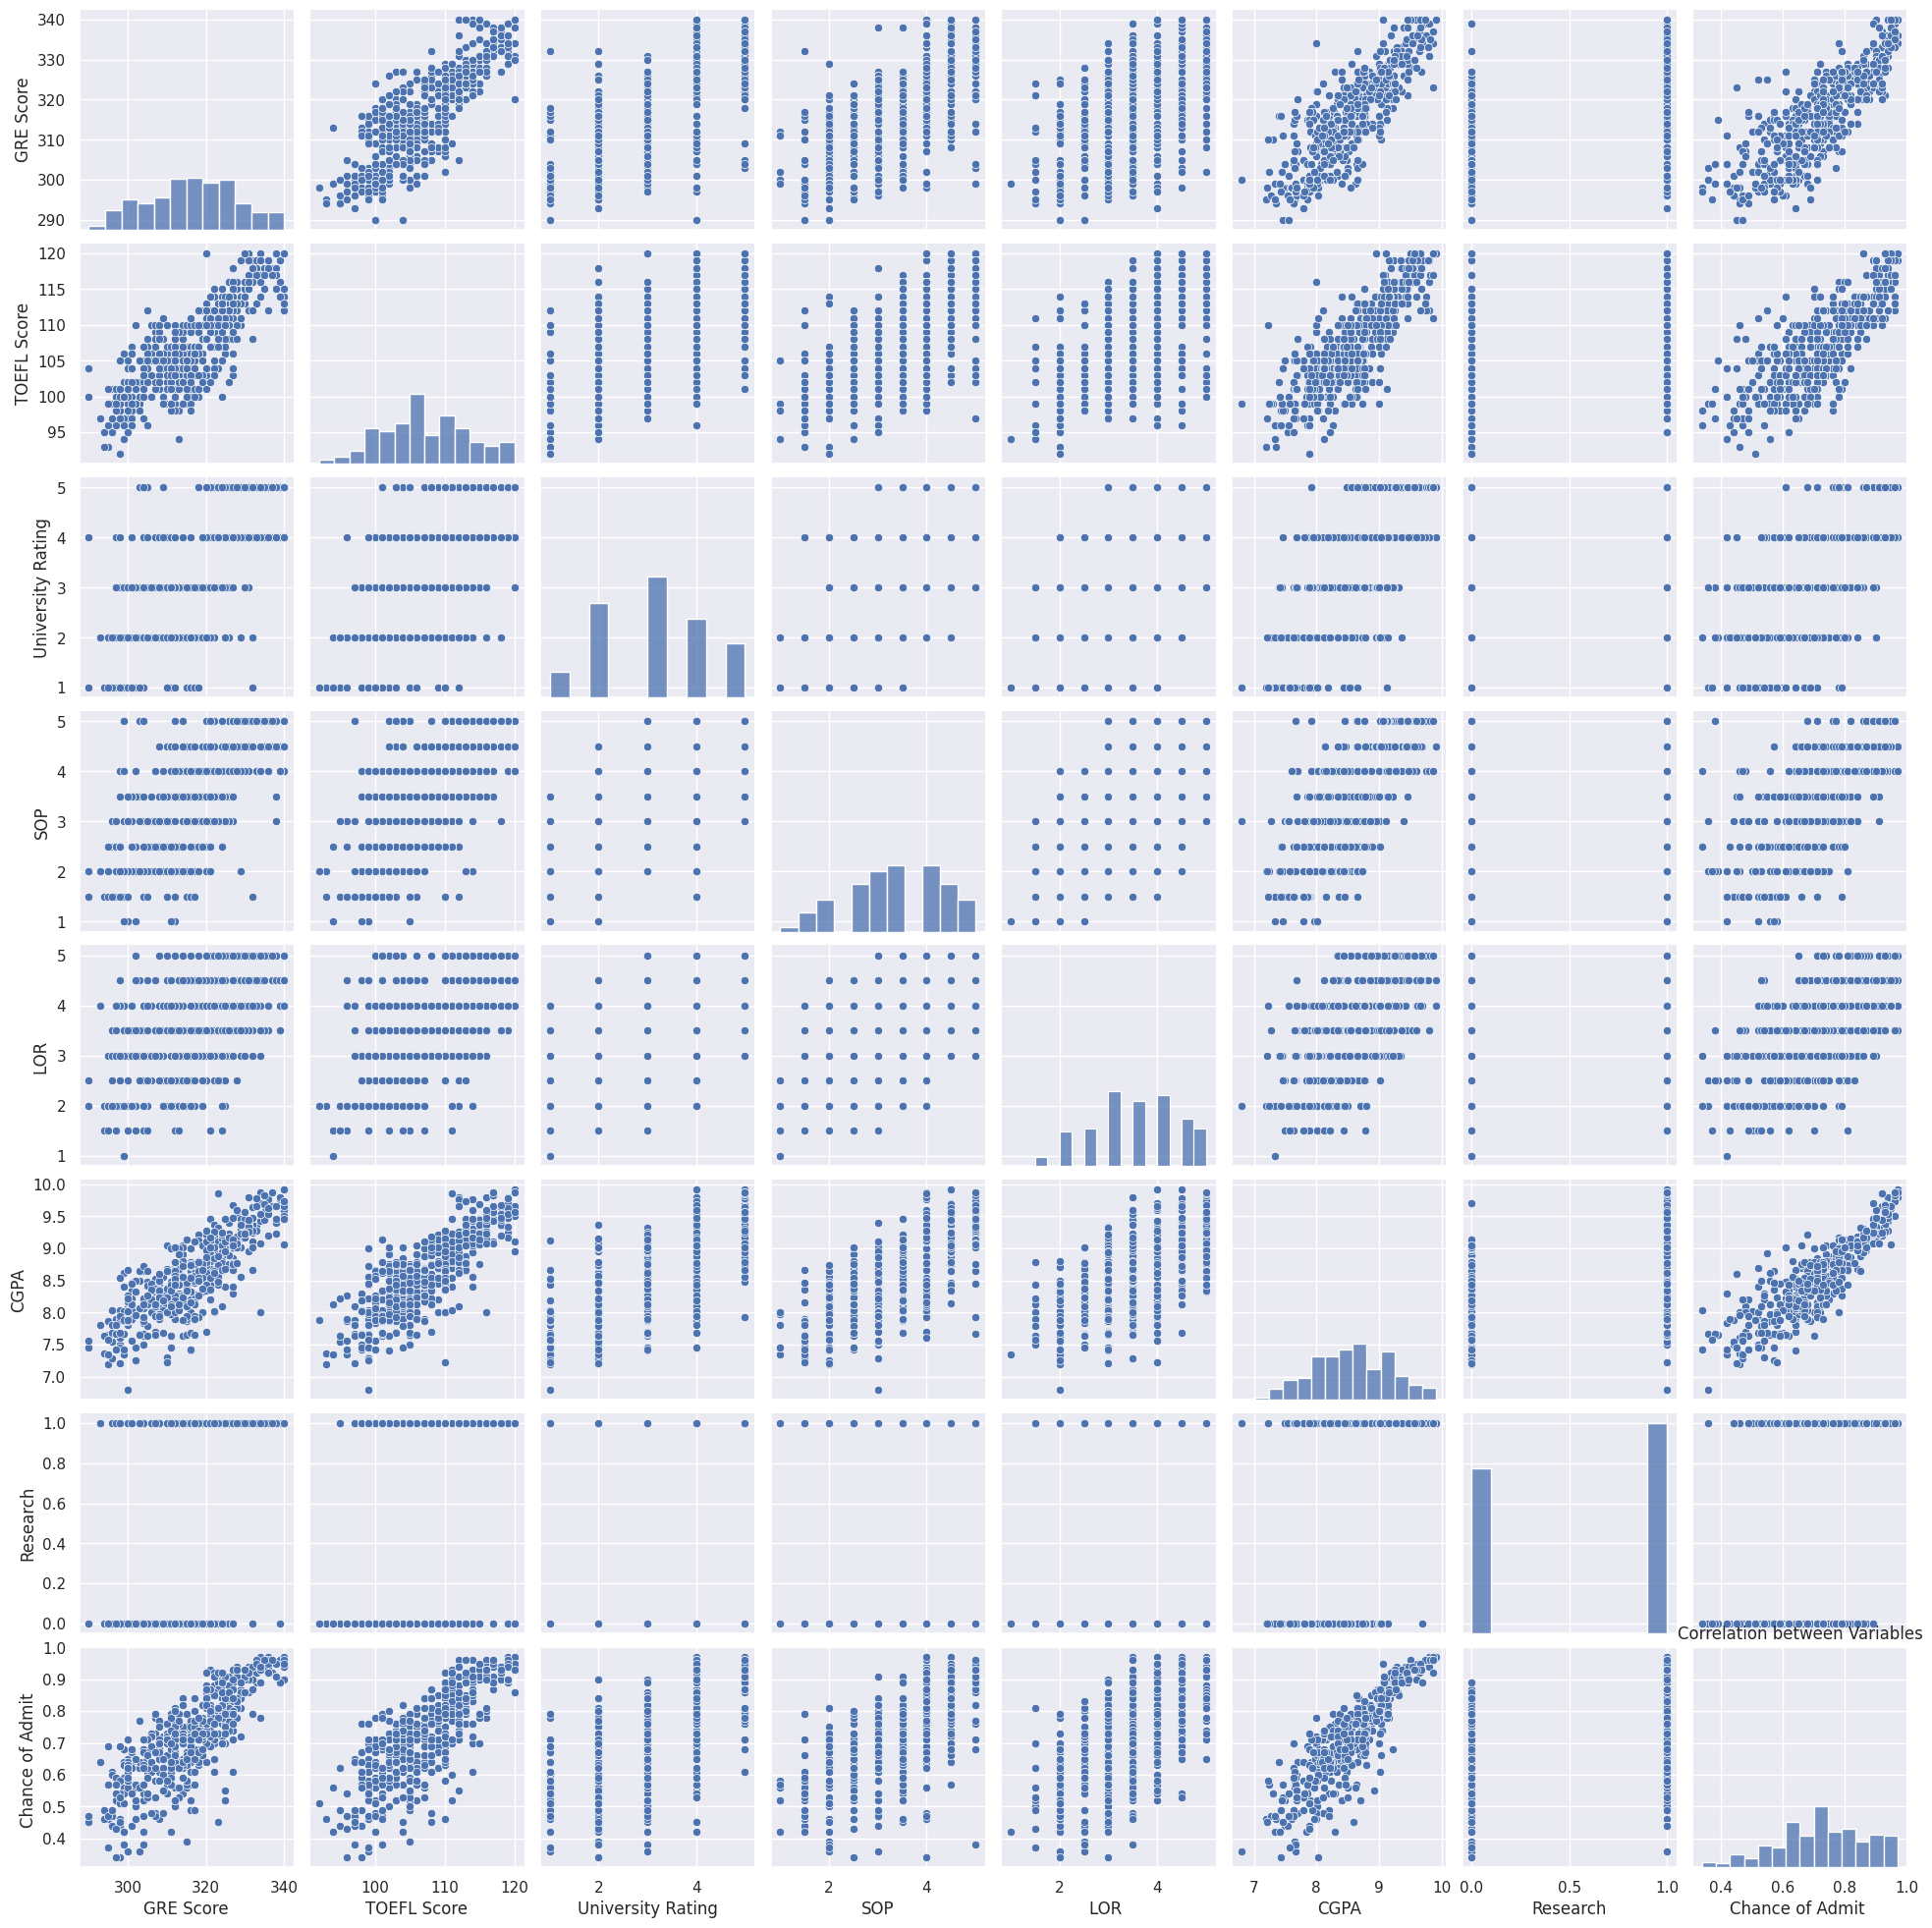

In [16]:
sns.pairplot(df)
plt.title('Correlation between Variables')
plt.show()

# Multi Variate Analysis

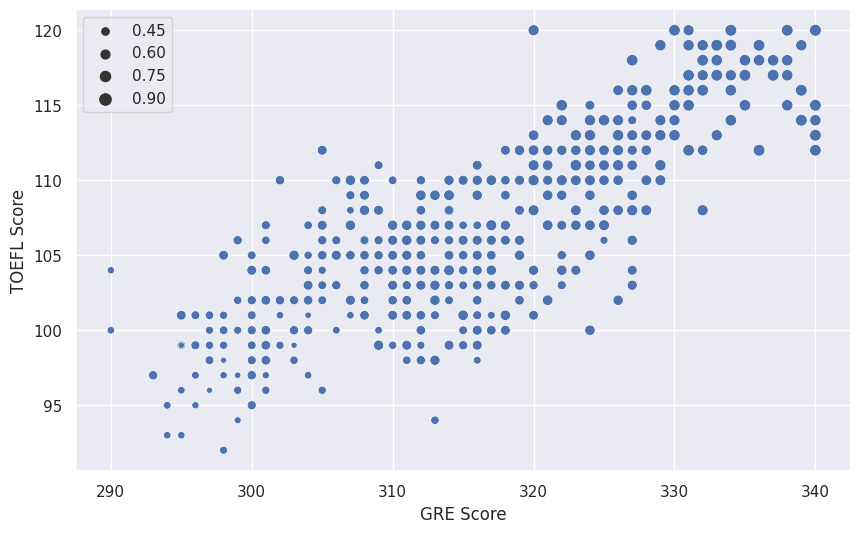

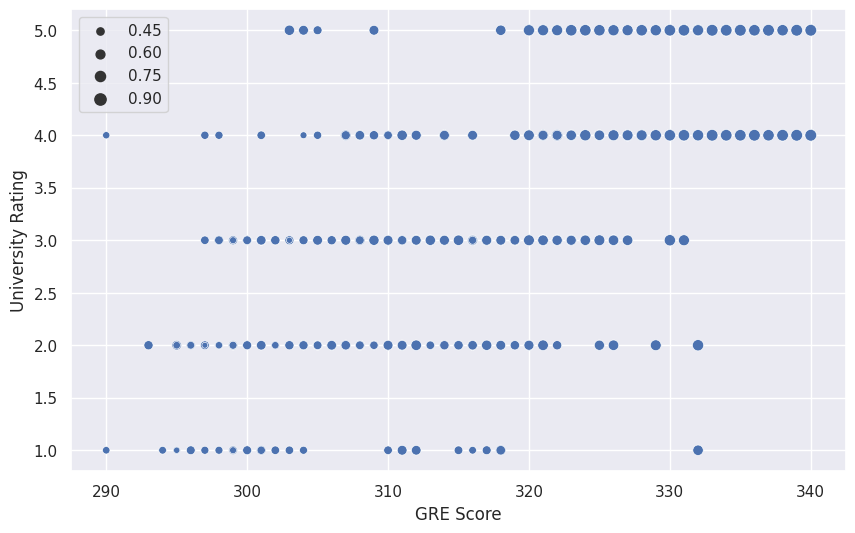

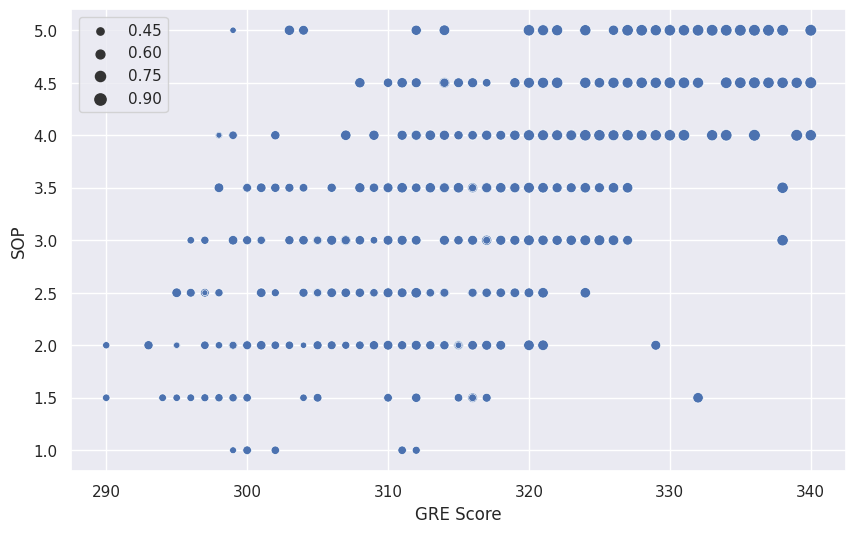

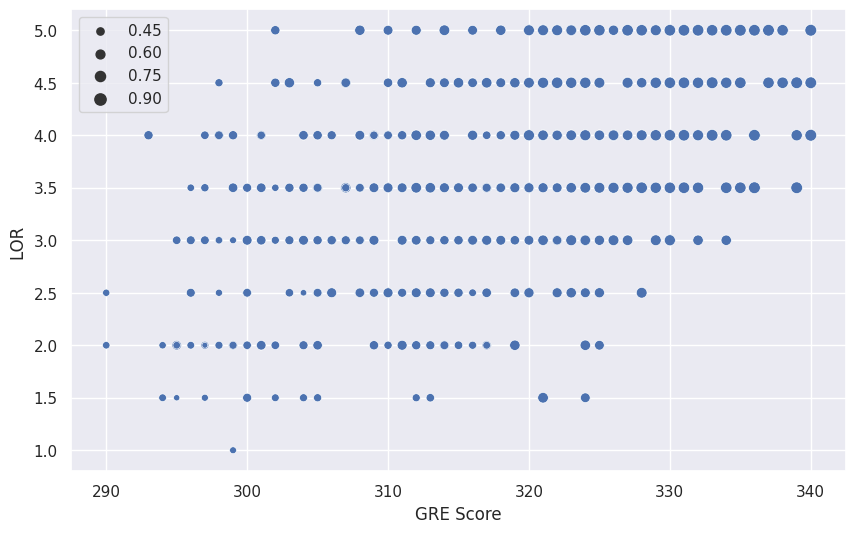

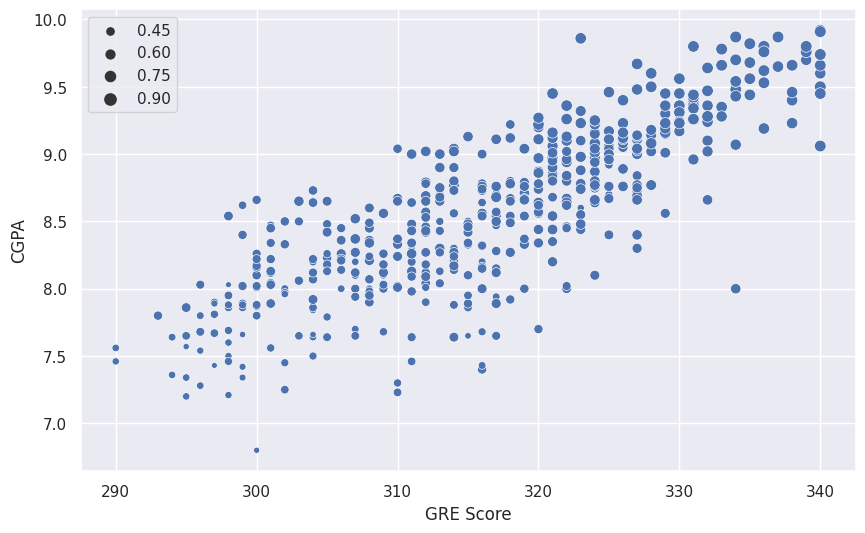

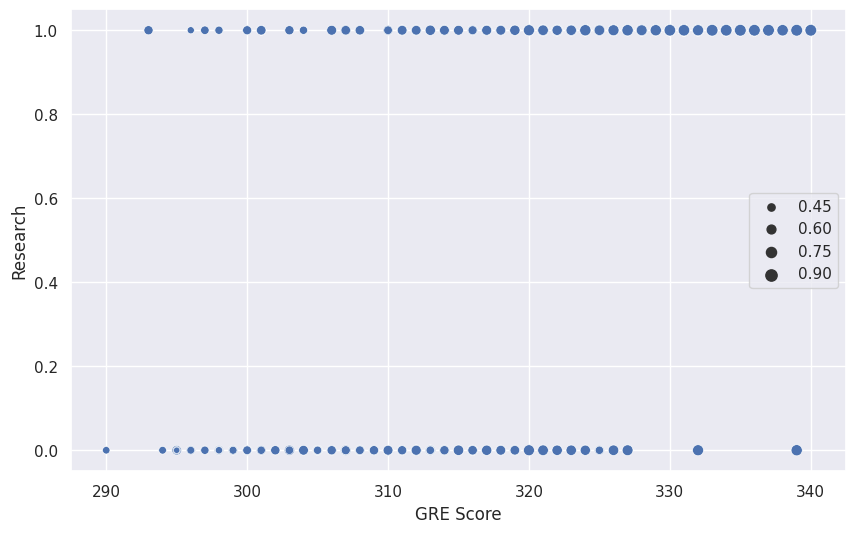

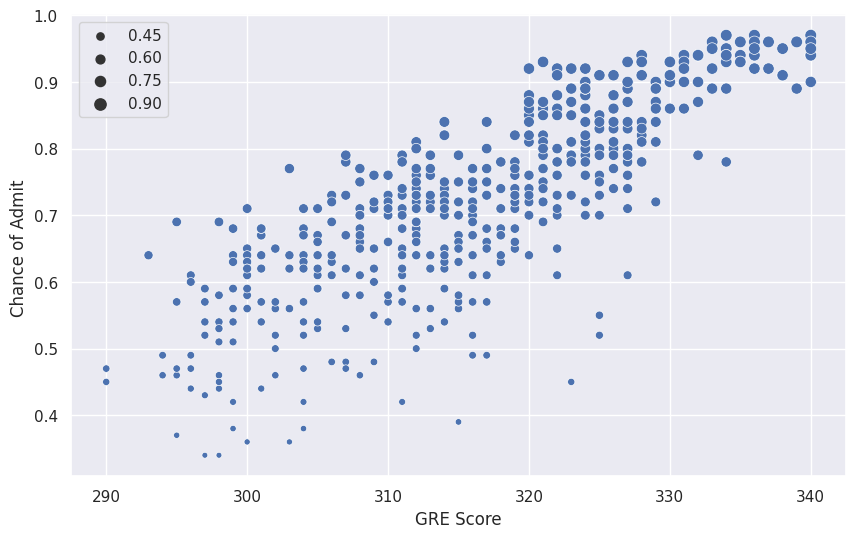

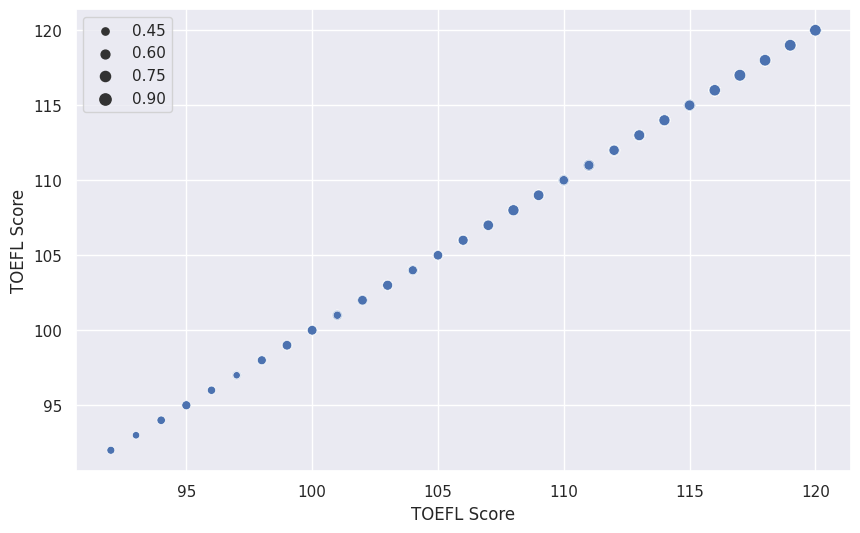

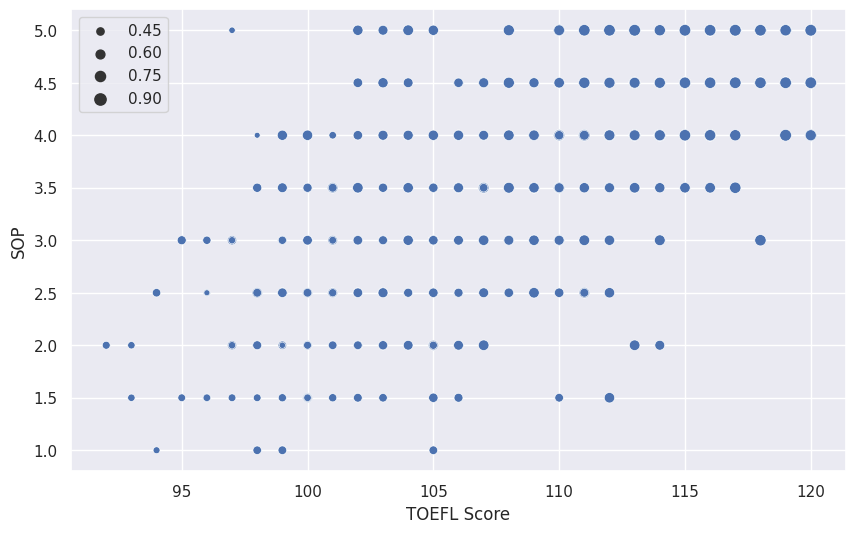

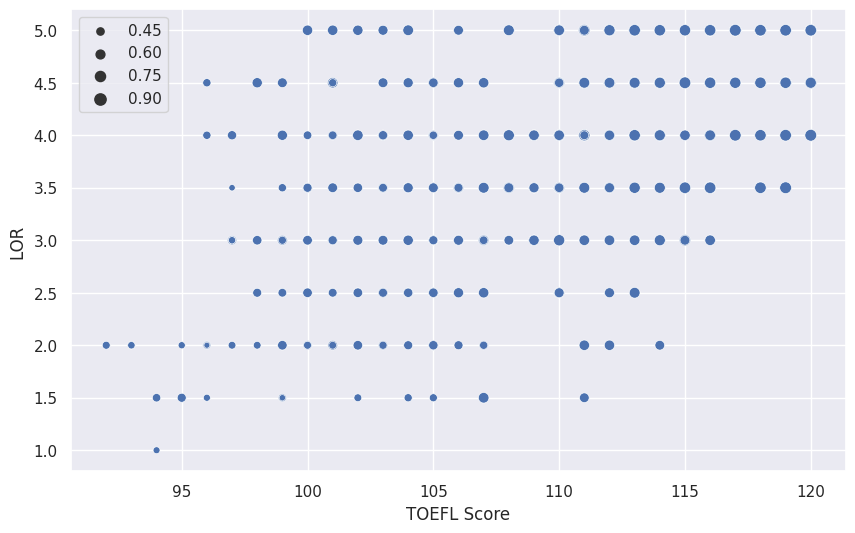

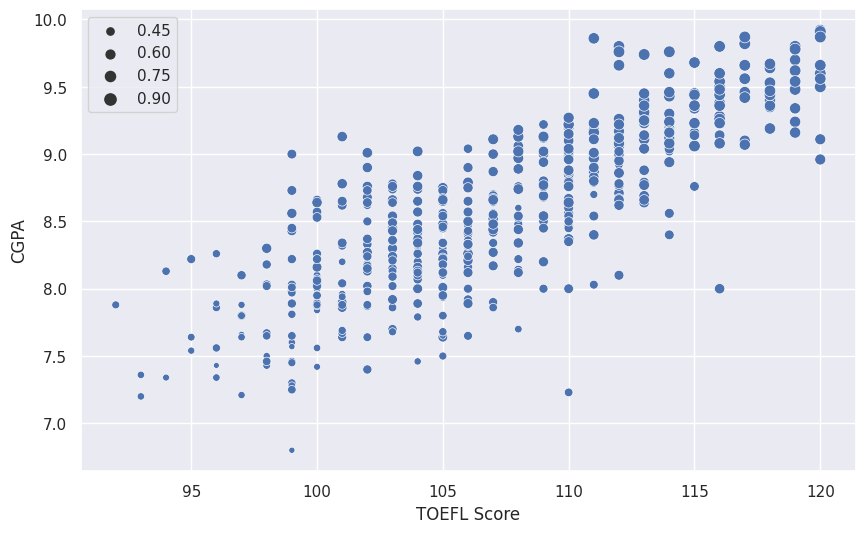

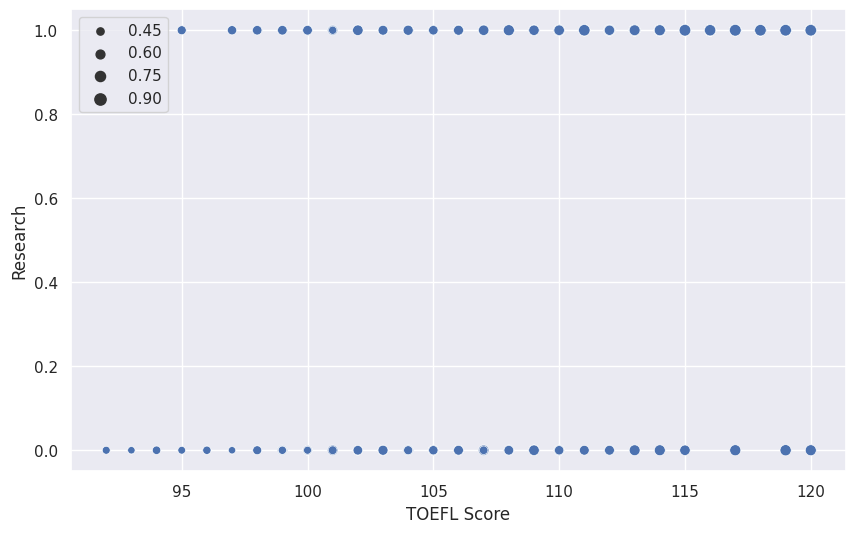

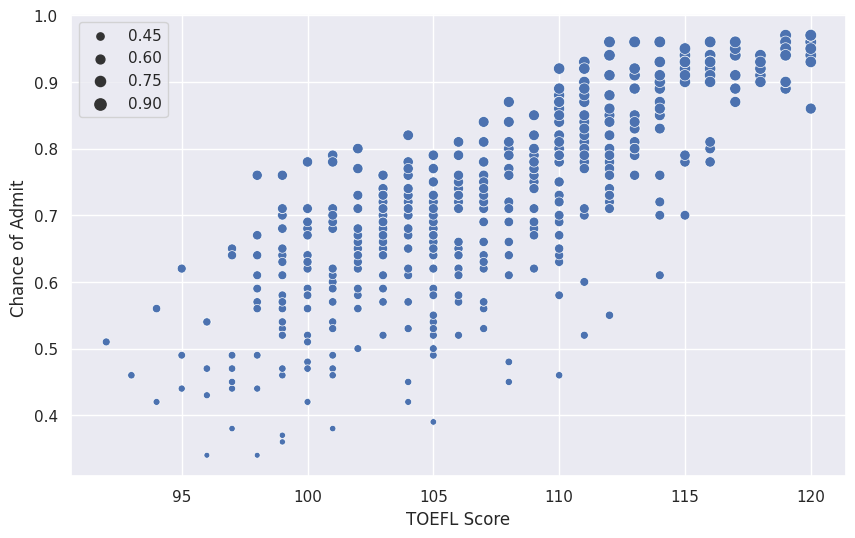

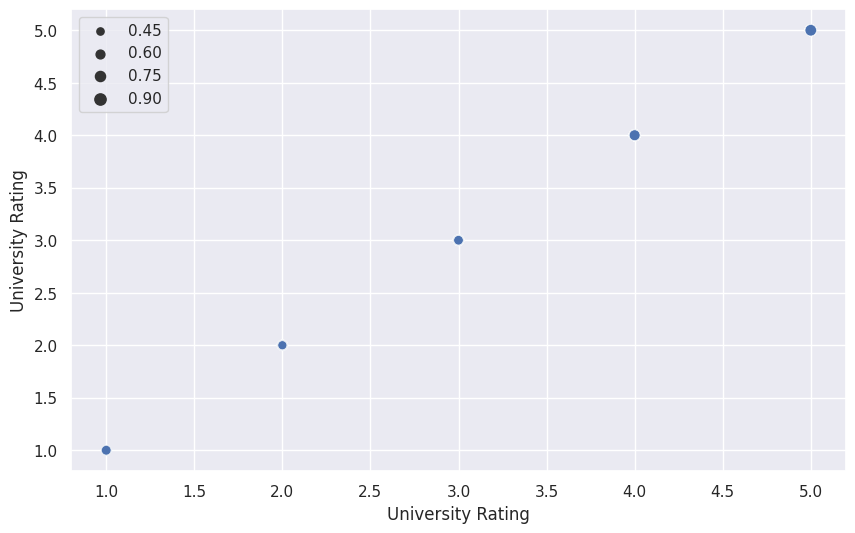

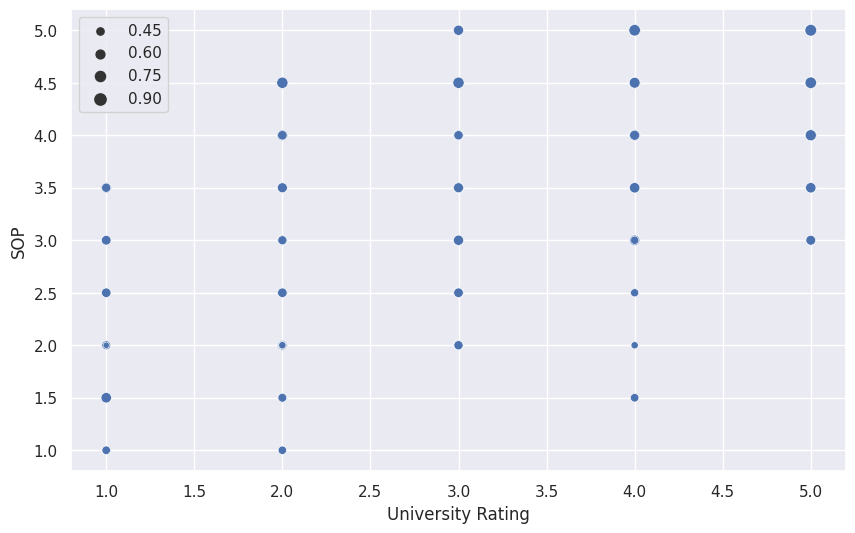

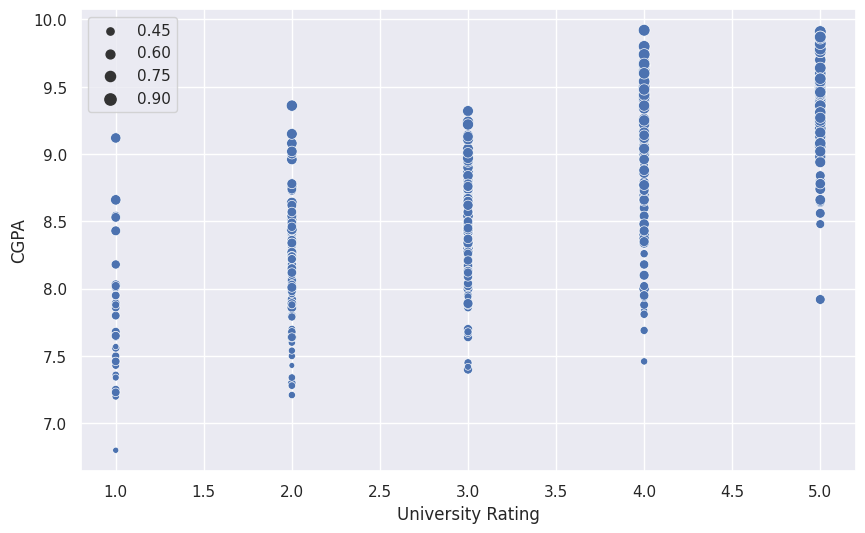

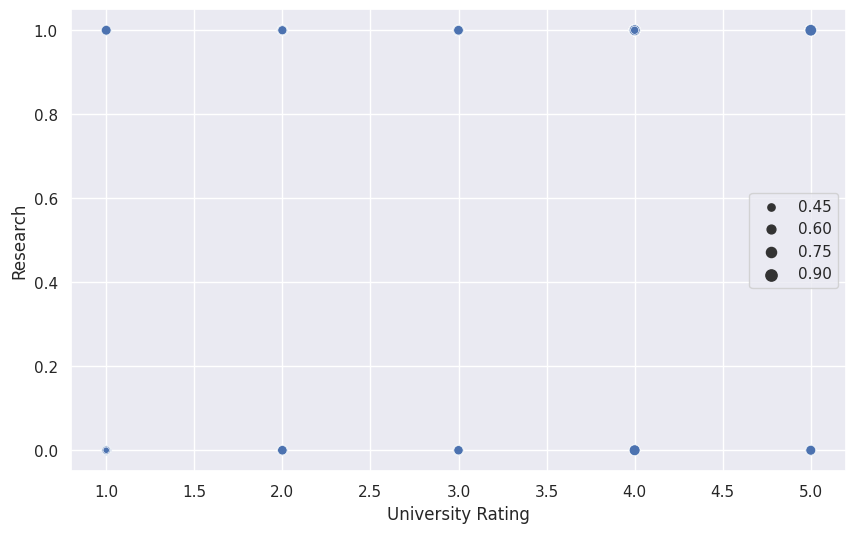

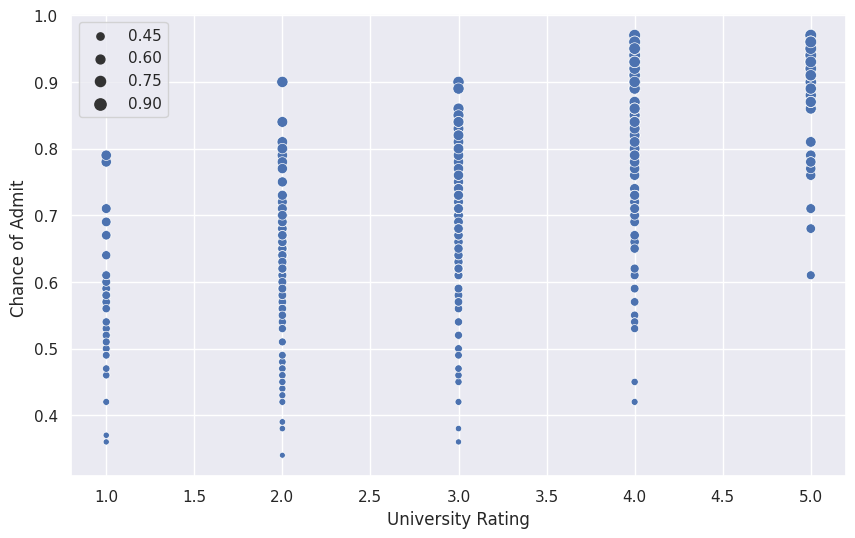

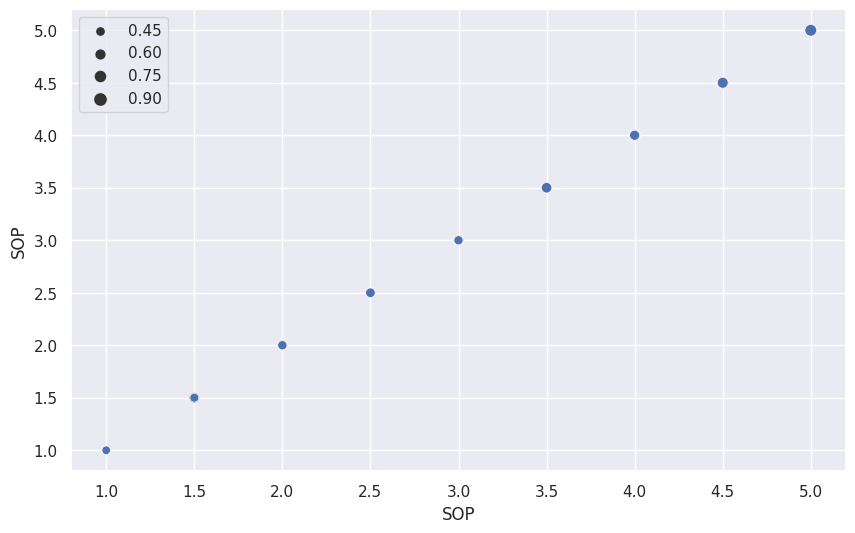

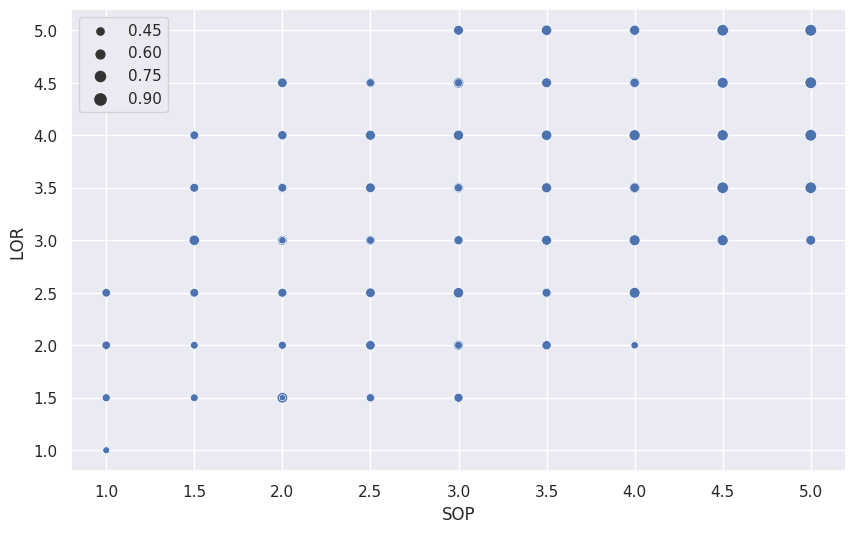

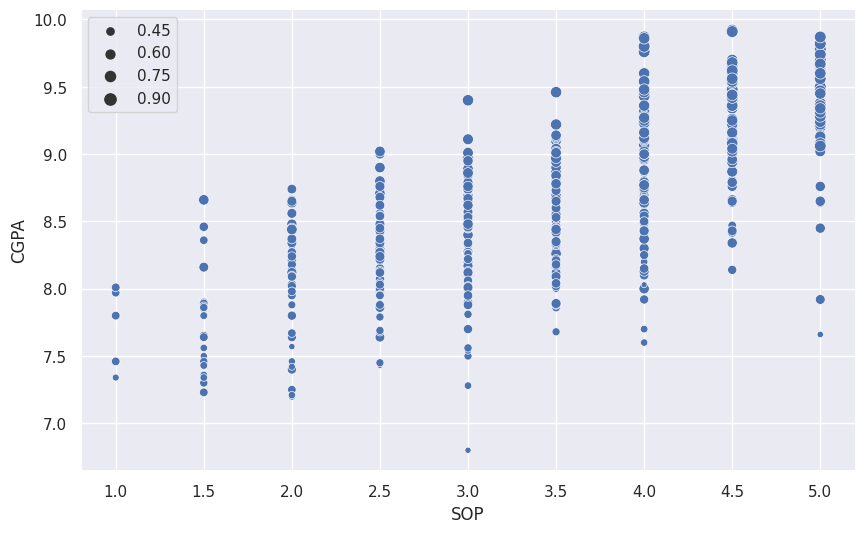

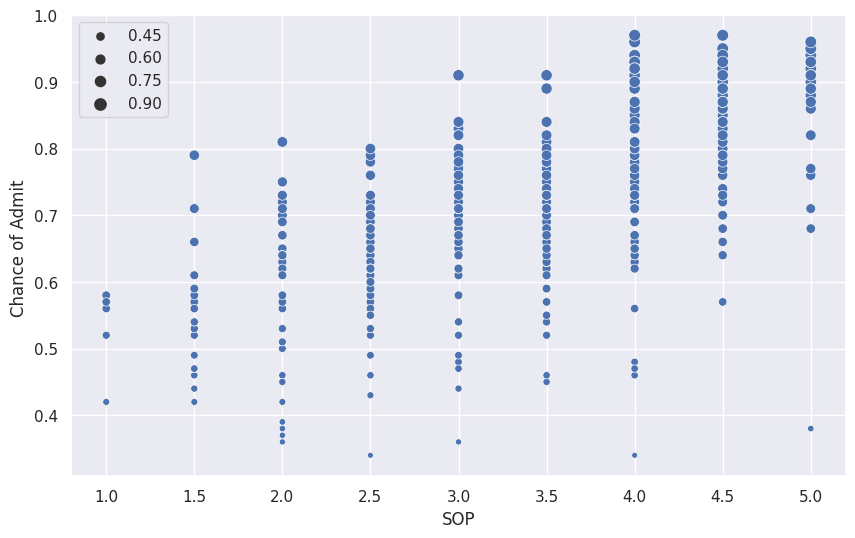

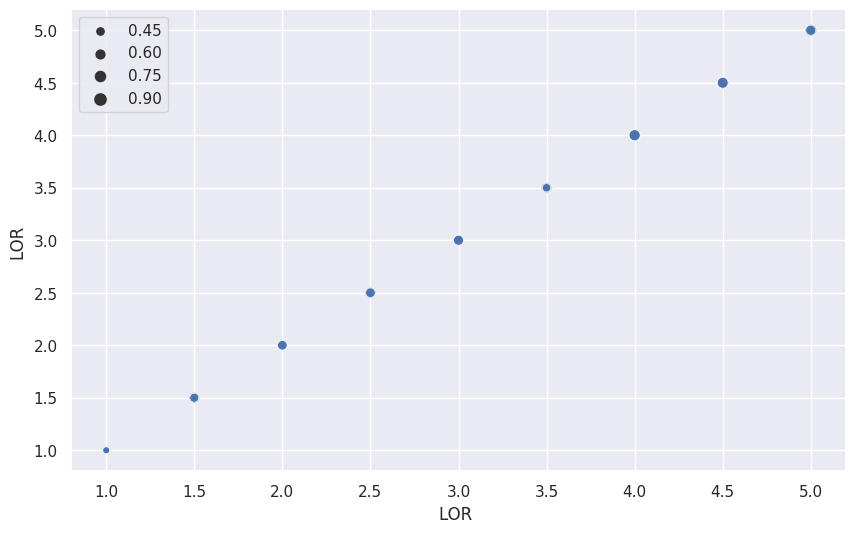

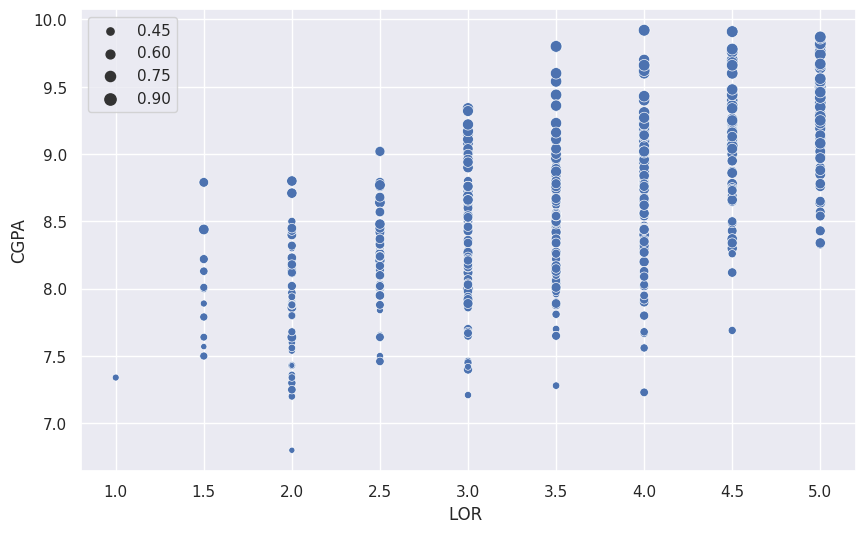

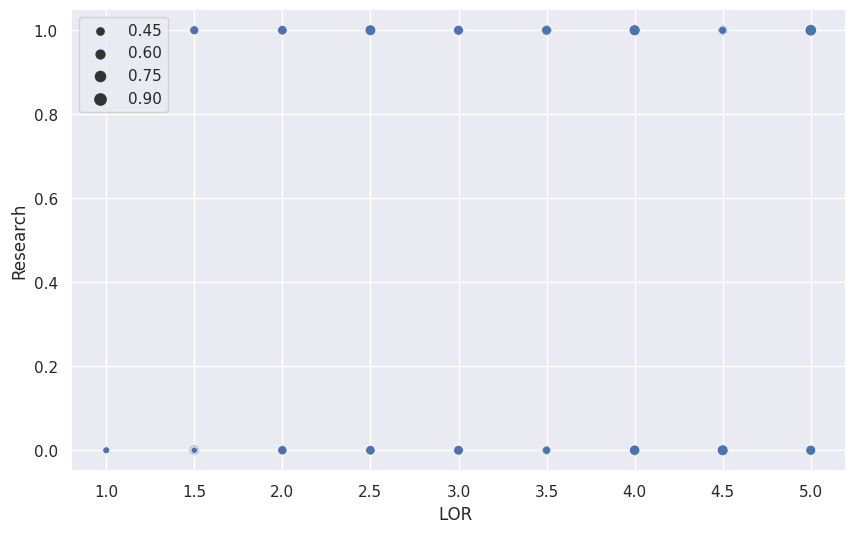

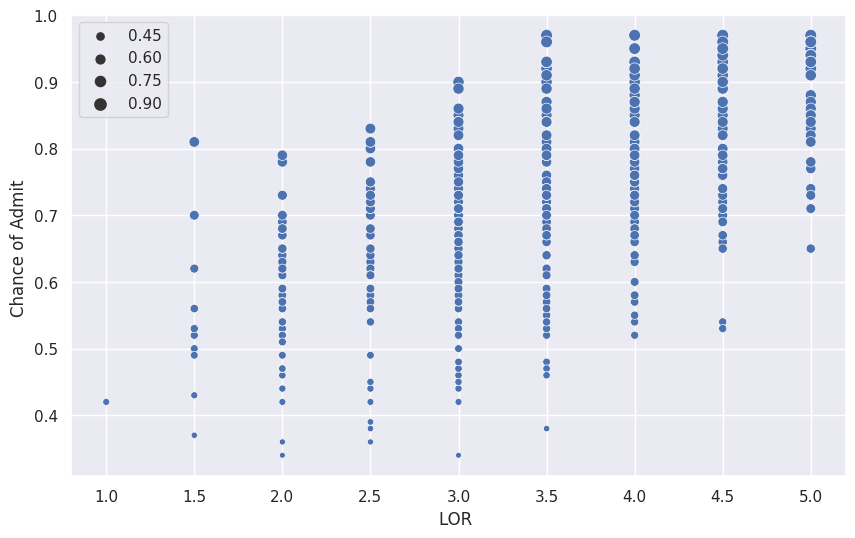

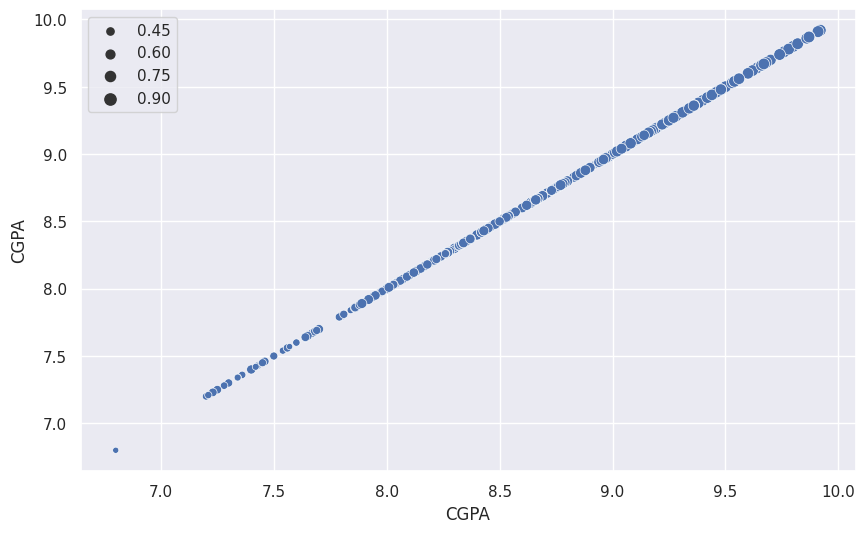

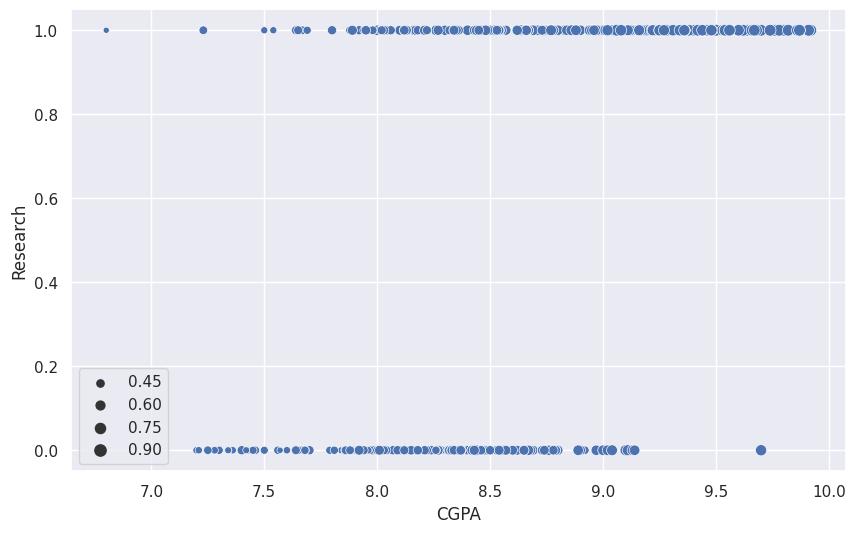

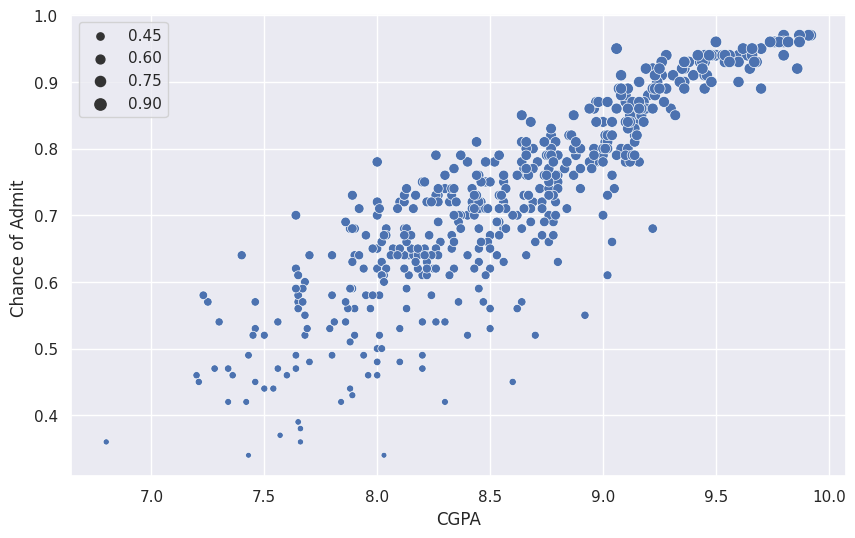

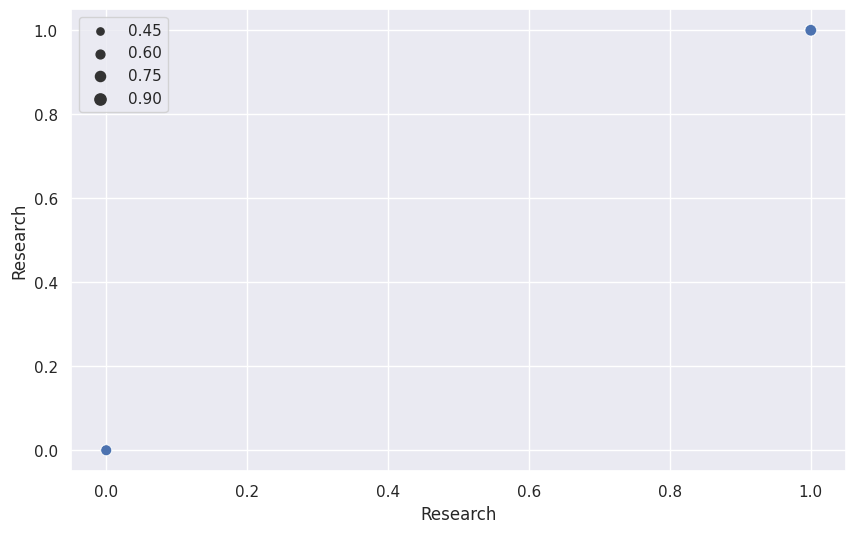

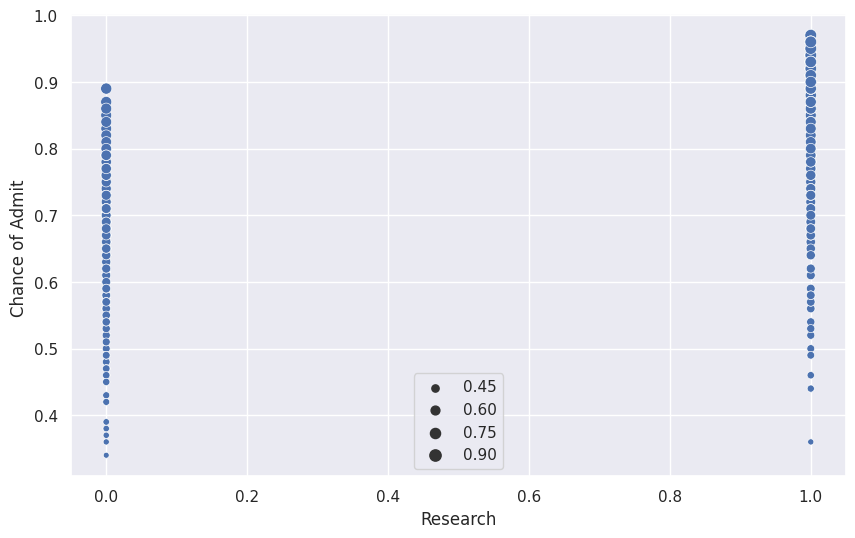

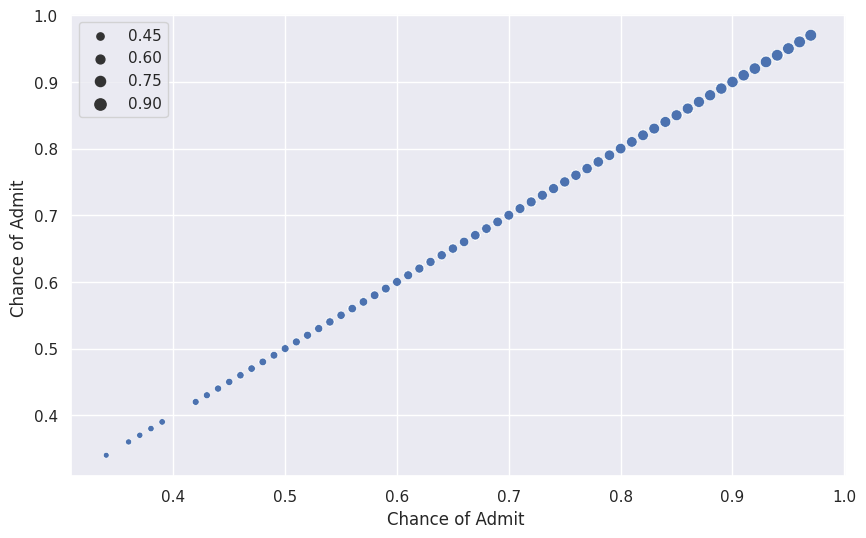

In [17]:
for i in range(len(df.columns)):
    for j in range(len(df.columns)):
        if ((df.columns[i]!=df.columns[j]) and (df.columns[i]!='Chance of Admit')) and (i+j < len(df.columns)):
            plt.figure(figsize=(10,6))
            sns.scatterplot(df,x=df.columns[i],y=df.columns[j+i],size=np.array(df.iloc[:,-1]))
            plt.show()

# Creating X and Y

In [18]:
y = df.iloc[:,-1]
x = df.iloc[:,:-1]

In [19]:
x.shape,y.shape

((500, 7), (500,))

# Scaling of Data

As the upperbound and lower bound of features are known to us, it is better to use Min-Max Scaler.
<br> Eg:
For SOP: Max:5 Min:0

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_scaled[0]

array([0.94      , 0.92857143, 0.75      , 0.875     , 0.875     ,
       0.91346154, 1.        ])

# Feature Engineering

In [21]:
from sklearn.decomposition import PCA
pca = PCA( n_components=7)
pca.fit_transform(x_scaled)

array([[-0.84807794, -0.20696598,  0.2072817 , ...,  0.01497818,
         0.00853747, -0.01510892],
       [-0.56574644,  0.03642681, -0.16334139, ..., -0.06047463,
         0.0941319 ,  0.03408644],
       [-0.1982169 ,  0.41913343, -0.12237393, ..., -0.05717831,
         0.01306383,  0.12866783],
       ...,
       [-0.93537846, -0.33204584,  0.03164183, ..., -0.11425469,
        -0.14010346, -0.0316256 ],
       [ 0.26367752, -0.58105538, -0.35827605, ..., -0.10656124,
         0.06774794,  0.05979777],
       [ 0.02333575, -0.77381768,  0.0590202 , ...,  0.019467  ,
         0.02210077,  0.0611346 ]])

In [22]:
variance_ratio = pca.explained_variance_ratio_
variance_ratio

array([0.64524312, 0.20163309, 0.05549861, 0.04299113, 0.0294474 ,
       0.01418206, 0.01100458])

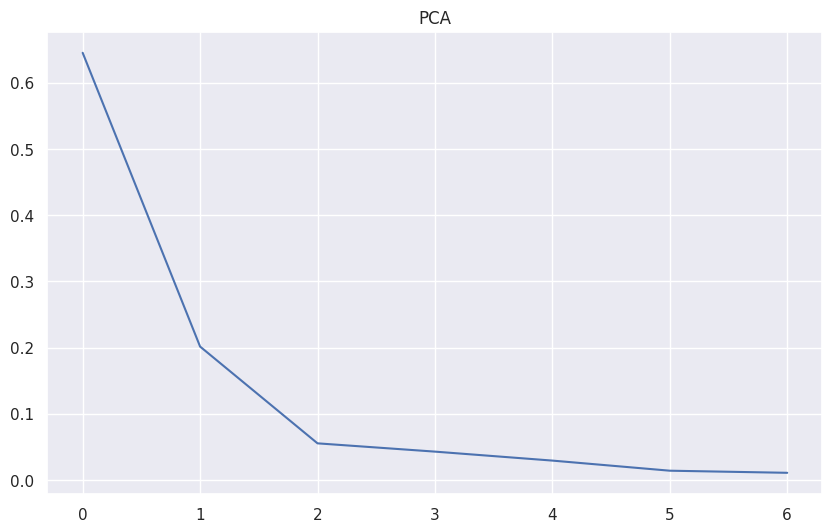

In [23]:
plt.figure(figsize=(10,6))
sns.lineplot(variance_ratio)
plt.title("PCA")
plt.show()

# New Features

In [24]:
pca = PCA( n_components=7)
x_featured = pca.fit_transform(x_scaled)
x_featured

array([[-0.84807794, -0.20696598,  0.2072817 , ...,  0.01497818,
         0.00853747, -0.01510892],
       [-0.56574644,  0.03642681, -0.16334139, ..., -0.06047463,
         0.0941319 ,  0.03408644],
       [-0.1982169 ,  0.41913343, -0.12237393, ..., -0.05717831,
         0.01306383,  0.12866783],
       ...,
       [-0.93537846, -0.33204584,  0.03164183, ..., -0.11425469,
        -0.14010346, -0.0316256 ],
       [ 0.26367752, -0.58105538, -0.35827605, ..., -0.10656124,
         0.06774794,  0.05979777],
       [ 0.02333575, -0.77381768,  0.0590202 , ...,  0.019467  ,
         0.02210077,  0.0611346 ]])

# Creating Training and Test Data for Model-10 (DL does not need Feature Engg.)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=41)

In [27]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((400, 7), (100, 7), (400,), (100,))

# Model-10 Using ANN

Description:
1. 1st Hidden Layer : 7 Nodes, Activation: Linear
2. 2nd Hidden Layer : 4 Nodes, Activation: Linear
3. 3rd Hidden Layer : 2 Nodes, Activation: Linear
4. Output Layer : 1 Node, Activation: Linear

## Creating the Model

In [28]:
model_10 =Sequential()
#1st Hidden Layer
model_10.add(Dense(units = 7,activation = 'relu',input_dim =7))
#2nd Hidden Layer
model_10.add(Dense(units = 7,activation = 'relu'))
#3rd Hidden Layer
model_10.add(Dense(units = 7,activation = 'relu'))
#Output Layer
model_10.add(Dense(units = 1,activation = 'linear'))

### Model Summary

In [29]:
model_10.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 176 (704.00 B)

 Trainable params: 176 (704.00 B)

 Non-trainable params: 0 (0.00 B)

### Model Compilation

In [30]:
model_10.compile(optimizer='Adam',loss='mean_squared_error')

### Model Training

In [31]:
history_10 = model_10.fit(x_train,y_train,epochs=20,validation_split = 0.2)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.4535 - val_loss: 0.3475
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3276 - val_loss: 0.2324
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2074 - val_loss: 0.1346
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1200 - val_loss: 0.0619
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0493 - val_loss: 0.0210
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0181 - val_loss: 0.0094
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0100 - val_loss: 0.0104
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0118 - val_loss: 0.0101
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0097 - val_loss: 0.0090
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0092 - val_loss: 0.0086
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0089 - val_loss: 0.0084
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0087 - val_l

## Loss Curve

In [32]:
pd.DataFrame(history_10.history).head(2)

,loss,val_loss
0,0.421162,0.347458
1,0.299224,0.232429


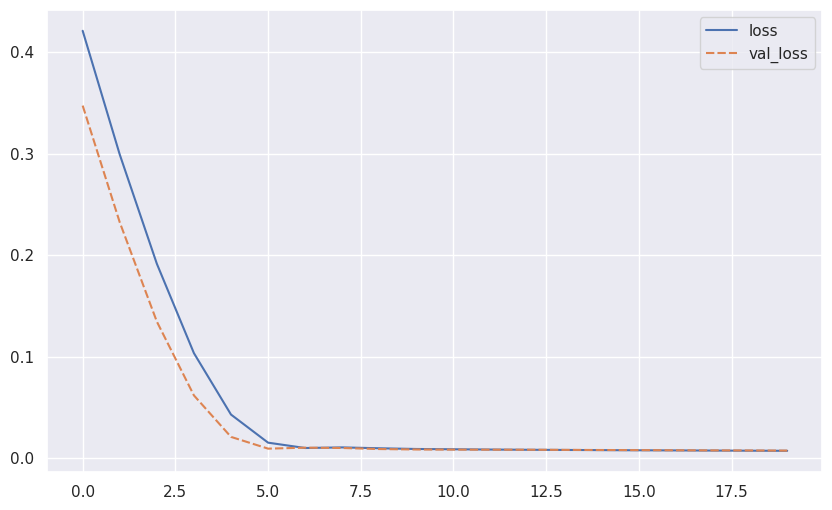

In [33]:
plt.figure(figsize=(10,6))
sns.lineplot(pd.DataFrame(history_10.history)[['loss','val_loss']])
plt.show()

## Values of Trainable Parameters

In [34]:
model_10.layers[0].get_weights()

[array([[-0.29222527, -0.65714735, -0.12663212,  0.08462427, -0.5873999 ,
          0.2075203 ,  0.05832602],
        [-0.17284246,  0.54596436,  0.30850515,  0.6716504 , -0.08800355,
         -0.6330028 ,  0.5039541 ],
        [ 0.34062955,  0.35300112,  0.54147327, -0.5427353 , -0.28693783,
          0.16930091,  0.6818806 ],
        [ 0.4170033 , -0.07186621, -0.41112524,  0.63123584, -0.35231224,
         -0.57989216, -0.46064022],
        [-0.570608  , -0.6166341 ,  0.62913704,  0.28488442, -0.11739008,
         -0.05354393,  0.12575893],
        [ 0.26730394, -0.38607007,  0.04835199, -0.35131338, -0.34136373,
         -0.14762932, -0.52864045],
        [-0.19221015,  0.03055608, -0.0442225 ,  0.15433496,  0.46825126,
         -0.28082108, -0.4529929 ]], dtype=float32),
 array([-0.0327685 , -0.02394387,  0.06167084,  0.05324161, -0.00621303,
         0.        ,  0.04318145], dtype=float32)]

In [35]:
model_10.layers[1].get_weights()

[array([[-0.27614802, -0.30394596,  0.09714907, -0.30570948,  0.47141623,
         -0.1405609 , -0.02335064],
        [-0.42158937,  0.3410734 , -0.35216308,  0.3898898 , -0.14837569,
          0.2343711 , -0.04577407],
        [ 0.46840653, -0.05623573,  0.19212294,  0.52260756, -0.44905826,
          0.4271048 ,  0.2996567 ],
        [-0.25119442, -0.05446637,  0.6732468 , -0.1549366 ,  0.18054706,
          0.03161525,  0.57139266],
        [-0.01501789, -0.3544106 , -0.40126464, -0.07904562, -0.15082015,
         -0.4885543 ,  0.11040765],
        [ 0.46427083, -0.09377664,  0.14741486,  0.35311568,  0.06095392,
         -0.03226739, -0.13369203],
        [-0.31700972, -0.12608176,  0.54536074, -0.2922324 , -0.40033317,
         -0.0319052 ,  0.07820266]], dtype=float32),
 array([ 0.06082214,  0.        ,  0.05335069,  0.05599989, -0.03055704,
        -0.0471602 ,  0.04631629], dtype=float32)]

In [36]:
model_10.layers[2].get_weights()

[array([[ 0.5330516 , -0.40017766, -0.34459338,  0.26895264, -0.46345875,
         -0.33083305,  0.3492112 ],
        [ 0.05720454,  0.30350673,  0.6197938 ,  0.6194482 , -0.28806153,
         -0.2795832 ,  0.05932051],
        [ 0.3912975 ,  0.42398134,  0.354054  ,  0.09672669,  0.14208214,
          0.31726223,  0.48371747],
        [ 0.24432744,  0.6841165 ,  0.17125249,  0.5986629 , -0.66254693,
          0.24262321,  0.26856002],
        [ 0.6199357 , -0.22085397,  0.41227862, -0.01842181, -0.22324139,
         -0.61636245, -0.39381975],
        [-0.5166503 , -0.5173885 ,  0.40171757,  0.17320651, -0.14704314,
         -0.5267545 , -0.60093564],
        [-0.4345074 ,  0.25362763, -0.3091196 , -0.5656885 ,  0.41351646,
         -0.512164  ,  0.2943813 ]], dtype=float32),
 array([-0.03926633,  0.04885643, -0.04473207,  0.07694734, -0.04168408,
         0.        ,  0.04877338], dtype=float32)]

In [37]:
model_10.layers[3].get_weights()

[array([[-0.3290254 ],
        [ 0.6177476 ],
        [-0.36320135],
        [ 0.72267425],
        [-0.07949219],
        [ 0.43214613],
        [ 0.7607931 ]], dtype=float32),
 array([0.04811893], dtype=float32)]

## Prediction

In [38]:
y_pred_10 = model_10.predict(x_test)
y_pred_10[:10]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[0.58277893],
       [0.7183142 ],
       [0.4947828 ],
       [0.584319  ],
       [0.8559874 ],
       [0.6979288 ],
       [0.7303557 ],
       [0.7567353 ],
       [0.49514043],
       [0.3993994 ]], dtype=float32)

## Accuracy

In [39]:
r2_score_10 = r2_score(y_test,y_pred_10)
mean_squared_error_10 = mean_squared_error(y_test,y_pred_10)
print(r2_score_10,mean_squared_error_10)

0.5230074533744737 0.00906638336080456
